In [13]:
import pandas as pd
import mplfinance as mpf
import rbot


In [14]:
bb = rbot.DummyBb()
bb.log_load(10)
ohlcv = bb.ohlcv(0, bb.log_end_ms, 60*60 * 2)
ohlcv_df = rbot.array_to_df(ohlcv)
ohlcv_df


,open,high,low,close,volume
timestamp,,,,,
2022-06-17 00:00:00+00:00,20355.0,20897.5,20196.0,20841.0,174619351.0
2022-06-17 02:00:00+00:00,20844.5,21018.0,20286.0,20326.5,112540724.0
2022-06-17 04:00:00+00:00,20327.0,20948.5,20271.0,20767.0,90076688.0
2022-06-17 06:00:00+00:00,20765.5,21239.5,20563.0,21050.5,134518293.0
2022-06-17 08:00:00+00:00,21050.5,21320.0,20832.0,20935.5,101060664.0
...,...,...,...,...,...
2022-06-26 14:00:00+00:00,21385.0,21484.5,21158.5,21305.5,78722828.0
2022-06-26 16:00:00+00:00,21305.5,21423.0,21109.0,21235.0,62274912.0
2022-06-26 18:00:00+00:00,21235.0,21290.0,21092.5,21266.0,40854907.0


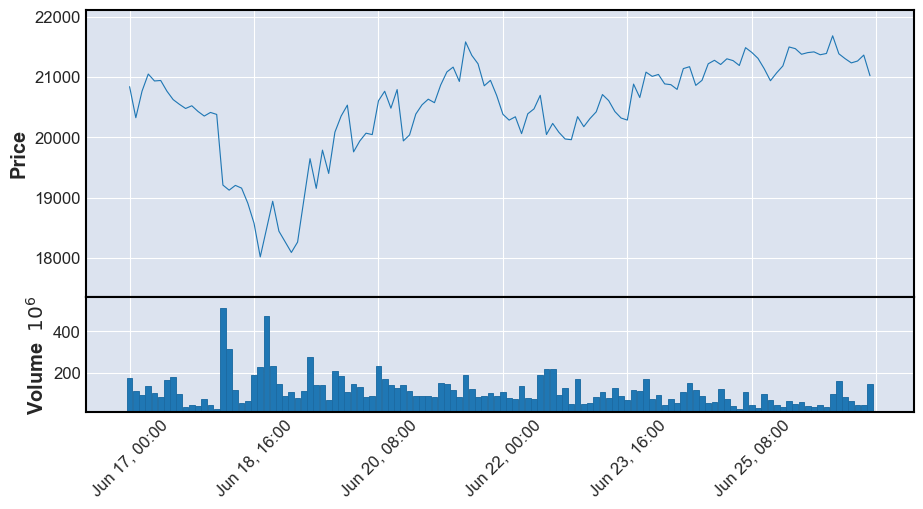

In [15]:
mpf.plot(ohlcv_df, type='line', volume=True, figratio=(16,8))

In [16]:
class Agent:
    def __init__(self, param_K=1.6):
            self.K = param_K                           # パラメターKを設定する。

    def on_clock(self, time_ms: int, session):
        ohlcv_array = session.ohlcv(60*60*2, 6)     # 最新足０番目　＋　５本の足を取得。 最新は６番目。
        ohlcv_df = rbot.array_to_df(ohlcv_array)         # ndarrayをDataFrameへ変換

        if len(ohlcv_df.index) < 6:                 # データが過去６本分そろっていない場合はなにもせずリターン
            return 

        print(rbot.PrintTime(time_ms) + " ontick")

        ohlcv_df["range"] = ohlcv_df["high"] - ohlcv_df["low"]      # レンジを計算

        ohlcv_latest = ohlcv_df[-2:-1]     # 最新足１本
        ohlcv_last_5 = ohlcv_df[:-2]       # 過去５本足

        range_width = ohlcv_last_5["range"].mean()      #　過去５本足のレンジの平均値

        # Long/Short判定
        detect_short = range_width * self.K < ohlcv_latest["high"][0] - ohlcv_latest["open"][0]
        detect_long  = range_width * self.K < ohlcv_latest["open"][0] - ohlcv_latest["low"][0]

        #　執行方法（まずはシンプルとにかくオーダを出す）
        if detect_long:
            return rbot.Order("Buy", session.buy_edge_price, 10, 600, "Open Long")    

        if detect_short:
            return rbot.Order("Buy", session.sell_edge_price, 10, 600, "Open Long")    


AttributeError: module 'rbot' has no attribute 'Session'

In [17]:
agent = Agent()
result = bb.run(agent, 60*60*2)

df = rbot.result_to_df(result)

call back tick by 7200[sec]
call back by update
call back by all log events
2022-06-17-12:00:00.000 ontick
2022-06-17-14:00:00.000 ontick
2022-06-17-16:00:00.000 ontick
2022-06-17-18:00:00.000 ontick
2022-06-17-20:00:00.000 ontick
2022-06-17-22:00:00.000 ontick
2022-06-18-00:00:00.000 ontick
2022-06-18-02:00:00.000 ontick
2022-06-18-04:00:00.000 ontick
2022-06-18-06:00:00.000 ontick
2022-06-18-08:00:00.000 ontick
2022-06-18-10:00:00.000 ontick
2022-06-18-10:00:00.000Long
2022-06-18-12:00:00.000 ontick
2022-06-18-14:00:00.000 ontick
2022-06-18-16:00:00.000 ontick
2022-06-18-18:00:00.000 ontick
2022-06-18-20:00:00.000 ontick
2022-06-18-22:00:00.000 ontick
2022-06-19-00:00:00.000 ontick
2022-06-19-00:00:00.000short
2022-06-19-02:00:00.000 ontick
2022-06-19-04:00:00.000 ontick
2022-06-19-06:00:00.000 ontick
2022-06-19-08:00:00.000 ontick
2022-06-19-10:00:00.000 ontick
2022-06-19-12:00:00.000 ontick
2022-06-19-12:00:00.000short
2022-06-19-14:00:00.000 ontick
2022-06-19-14:00:00.000short
202

In [12]:
df


,timestamp,order_id,sub_id,order_type,post_only,create_time,status,open_price,close_price,size,volume,profit,fee,total_profit,pos_change,message


In [18]:
result

[]